In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sms-spam-collection-dataset/spam.csv


<h1 style="font-family: 'Poppins', sans-serif; font-size: 32px; text-align: center; color: #31393C; background-color: #FDCA40; padding: 20px; border-radius: 10px">Spam Messages Filtering using NLP<h1>

<p style="font-family: 'Poppins', sans-serif; font-size: 16px; text-align: left;">So I recently started Natural Language Processing and I thought I would just keep a record of what I am learning and understanding. This notebook can also be helpful to anyone who is just starting NLP.<p>

<h1 style="font-family: 'Poppins', sans-serif; font-size: 22px; text-align: left; color: #2176FF;">1. Natural Language Processing</h1>

<p style="font-family: 'Poppins', sans-serif; font-size: 16px; text-align: left; color: #000;">Natural language processing (NLP) is a collective term referring to automatic computational processing of human languages. Basically, we are converting human language such that computer understands it, analyzes it and gives us back the result we need.<br><br> For eg. Chatbots are the best example of this. Chatbots are software applications that use natural language processing to understand what a human wants, and guides them to their desired outcome with as little work for the end user as possible.<br><br>Other examples are Speech Recognition, Filtering Spams, etc.</p>

<h1 style="font-family: 'Poppins', sans-serif; font-size: 22px; text-align: left; color: #2176FF;">3. Basic Analysis of the data</h1>

<p style="font-family: 'Poppins', sans-serif; font-size: 16px; text-align: left; color: #000;">I will be working on this sms spam collection dataset to build a model to predict spam and ham messages.</p><br>

In [2]:
# importing important libraries
import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#reading the csv file
messages = pd.read_csv("/kaggle/input/sms-spam-collection-dataset/spam.csv")

In [4]:
messages.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


<p style="font-family: 'Poppins', sans-serif; font-size: 16px; text-align: left; color: #000;">The number of missing values is too much to take into consideration. I will just drop these columns with NaN values. We will only take the Text message and its type ie ham or spam into consideration for our model</p><br>

In [6]:
messages = messages.drop('Unnamed: 2', axis=1)

In [7]:
messages = messages.drop('Unnamed: 3', axis=1)

In [8]:
messages = messages.drop('Unnamed: 4', axis=1)

In [9]:
messages.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
messages.describe()

,v1,v2
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [11]:
messages.groupby('v1').describe()

v2                                                               
     count unique                                                top freq
v1                                                                       
ham   4825   4516                             Sorry, I'll call later   30
spam   747    653  Please call our customer service representativ...    4

<p style="font-family: 'Poppins', sans-serif; font-size: 16px; text-align: left; color: #000;">As you can see the top Ham message is "Sorry, I'll call later" and the top spam message is "Please call our customer service....."</p>
<p style="font-family: 'Poppins', sans-serif; font-size: 16px; text-align: left; color: #000;">Now this might help in the future as we make the model to differentiate between the Ham and Spam message."</p>

In [12]:
messages['length'] = messages['v2'].apply(len)

In [13]:
messages.head()

,v1,v2,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


<p style="font-family: 'Poppins', sans-serif; font-size: 16px; text-align: left; color: #000;">The length of the messages can be another identifier to check whether the message is spam or ham. Spam messages might have similar lengths and it may help to filter these out.</p>

<AxesSubplot:xlabel='length', ylabel='Count'>

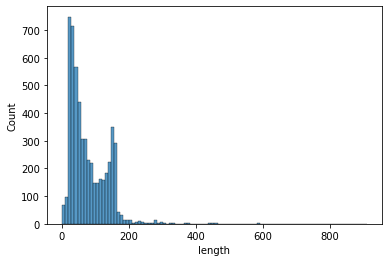

In [14]:
sns.histplot(messages['length'], bins=100)

array([<AxesSubplot:title={'center':'ham'}>,
       <AxesSubplot:title={'center':'spam'}>], dtype=object)

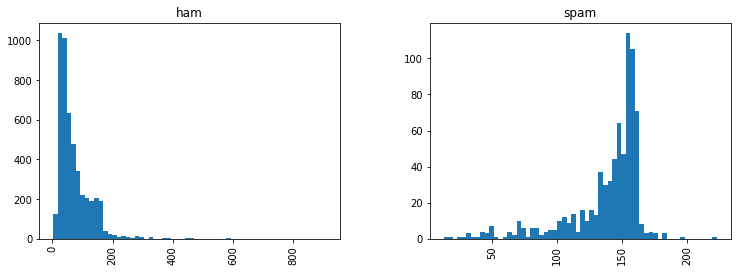

In [15]:
messages.hist(column='length', by='v1', bins=60, figsize=(12,4))

<p style="font-family: 'Poppins', sans-serif; font-size: 16px; text-align: left; color: #000;">This clearly proves the fact that most Ham messages are short and concise with only average length of around 30-50.</p>
<p style="font-family: 'Poppins', sans-serif; font-size: 16px; text-align: left; color: #000;">Spam messages are relatively big with average length being around 150. Thus we can use this a differentiating factor to find out if the message is spam or ham.</p>
<p style="font-family: 'Poppins', sans-serif; font-size: 16px; text-align: left; color: #000;">Let's look at some other factors that can be used to distinguish.</p>

<h1 style="font-family: 'Poppins', sans-serif; font-size: 22px; text-align: left; color: #2176FF;">4. Text Preprocessing</h1>

<p style="font-family: 'Poppins', sans-serif; font-size: 16px; text-align: left; color: #000;">Since all of our data is mostly String, we have to convert it into some form i.e. make list of tokens or in simple words make a list with the sentence converted to a list of all the words it includes. Classification models only take in numeric values so accordingly we have to vectorize our data later.</p>

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
msg_train, msg_test, label_train, label_test = train_test_split(messages['v2'], messages['v1'], test_size=0.3)

In [18]:
import string
from nltk.corpus import stopwords

<p style="font-family: 'Poppins', sans-serif; font-size: 16px; text-align: left; color: #000;">Now let's create a function to do our processing. Things we are going to do:<ul style="font-family: 'Poppins', sans-serif; font-size: 16px; text-align: left; color: #000;"><li>Remove Punctuations </li><li>Remove stop words(is, an, the, etc.)</li><li>Return list of clean words.</li></ul></p>

In [19]:
def text_process(mess):
    no_punc = [char for char in mess if char not in string.punctuation]
    no_punc = "".join(no_punc)
    return [word for word in no_punc.split() if word.lower() not in stopwords.words('english')]

In [20]:
messages.head()

,v1,v2,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [21]:
#applying function
msg_train.head(5).apply(text_process)

3266                        [Ok, come, n, pick, u, engin]
3139    [sexy, sexy, cum, text, im, wet, warm, ready, ...
2822    [u, ask, darren, go, n, pick, u, lor, oso, sia...
977     [Dont, hesitate, know, second, time, weakness,...
841     [Pls, send, comprehensive, mail, im, paying, m...
Name: v2, dtype: object

<h1 style="font-family: 'Poppins', sans-serif; font-size: 22px; text-align: left; color: #2176FF;">4. Building the Classification Models</h1>

<p style="font-family: 'Poppins', sans-serif; font-size: 16px; text-align: left; color: #000;">Now that we have created our list of tokens we need to convert it into vectors such that the our model understands and differentiates it properly. We are basically making a bag of words. We'll use Count Vectorizer from Sklearn library to do this.</p>

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

In [23]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [24]:
pipeline.fit(msg_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7fa981cbc440>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [25]:
predictions = pipeline.predict(msg_test)

In [26]:
from sklearn.metrics import classification_report
print(classification_report(predictions,label_test))

              precision    recall  f1-score   support

         ham       1.00      0.95      0.98      1524
        spam       0.67      1.00      0.80       148

    accuracy                           0.96      1672
   macro avg       0.84      0.98      0.89      1672
weighted avg       0.97      0.96      0.96      1672



<h1 style="font-family: 'Poppins', sans-serif; font-size: 22px; text-align: left; color: #FA8334;">The Model performed well with an overall accuracy of 96% but the f1-score of Spam was not up to the mark. I will try doing more feature engineering on this to get a better score for Spam.</h1>